# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

In [2]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (5157, 14)


In [3]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


## 2. Generating Word Frequency

In [4]:
import spacy

In [5]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [6]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values)

In [7]:
# Creating Doc object
doc=nlp(combined_tweets)

In [8]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    
    # Printing frequencies
    print(word_freq[:20])
    
    return word_freq

In [9]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 5770
demonetization    2523
.                 2318
:                 2048
Demonetization    2003
,                 1735
to                1659
                 1642
the               1593
of                1588
RT                1371
in                1343
\r\n              1288
is                1088
on                 946
a                  816
?                  723
and                711
India              685
's                 664
dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [10]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

In [12]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 16559


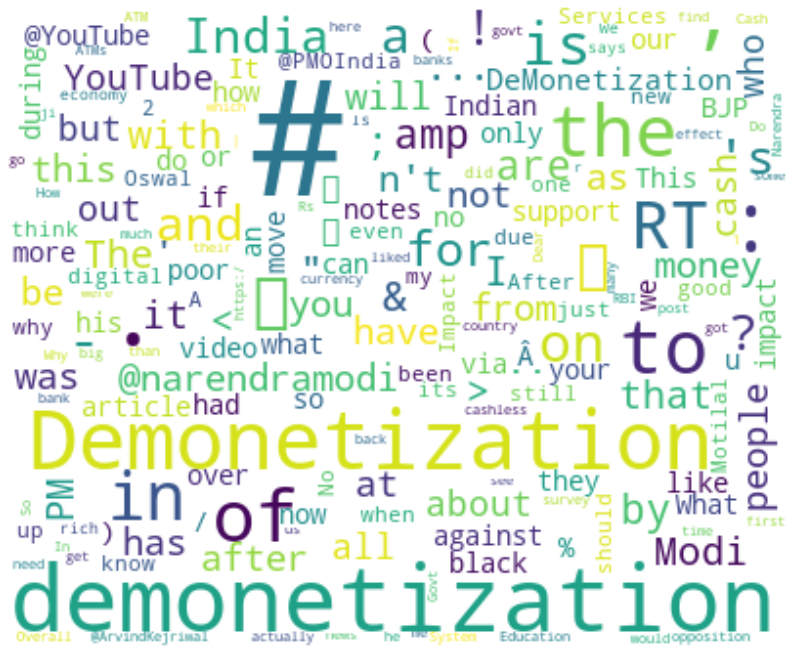

In [13]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [14]:
import re

In [15]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [16]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [17]:
# Creating Doc object
doc=nlp(combined_tweets)

In [18]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [19]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4776
                  1626
                 1358
\r\n              1286
india              731
amp                438
modi               402
>                  363
<                  352
@narendramodi      328
money              324
people             318
\r\n\r\n           314
pm                 286
                  284
cash               283
youtube            255
impact             186
black              163
like               163
dtype: int64


In [20]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14386


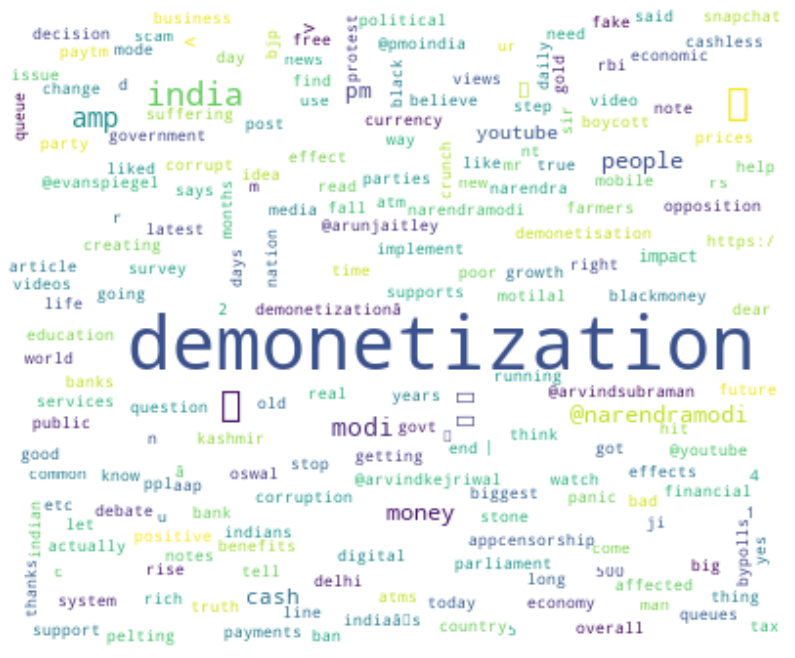

In [21]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [22]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [23]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [24]:
# Creating Doc object
doc=nlp(combined_tweets)

In [25]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [26]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4780
india              731
modi               402
@narendramodi      328
money              325
people             318
pm                 287
cash               283
youtube            255
impact             186
like               163
black              163
digital            153
@youtube           149
support            146
govt               133
u                  127
bjp                127
poor               123
notes              120
dtype: int64


In [27]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14352


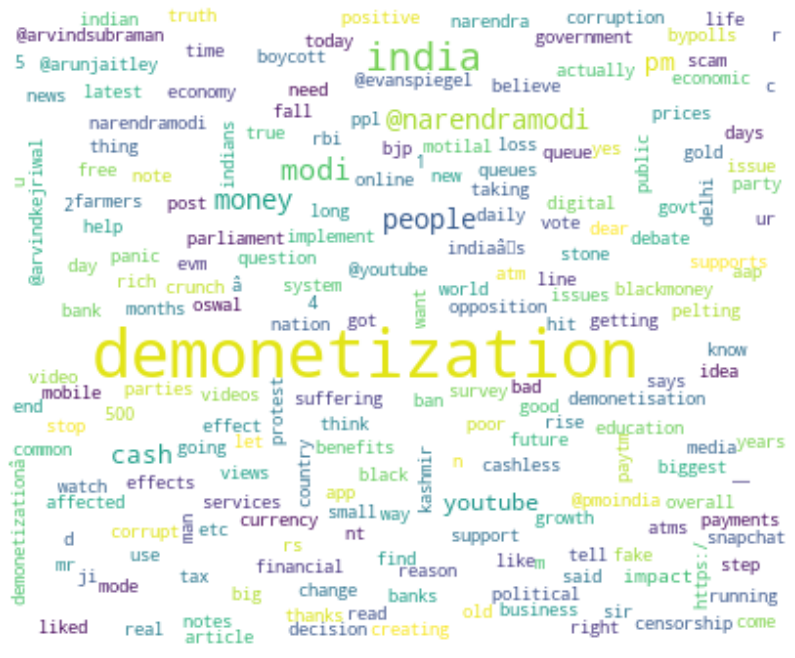

In [28]:
# Generating wordcloud
generate_wordcloud(word_freq)